## Task: Game Platform Preference

You are interested in creating your own video game. Analyze a dataset from IGN which ranks the different platforms and game types.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


### Load and Review Data
For this analysis we will use the: data/ign_scores.csv
- Use the `Platform` column as index.

In [78]:
file_path = '../data/ign_scores.csv'
ign_df = pd.read_csv(file_path, index_col='Platform')

# Print head()
ign_df.head()


,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


### Task: Which Platform is Best?

Create a `bar` chart that shows the average score for `racing` games, for each platform.

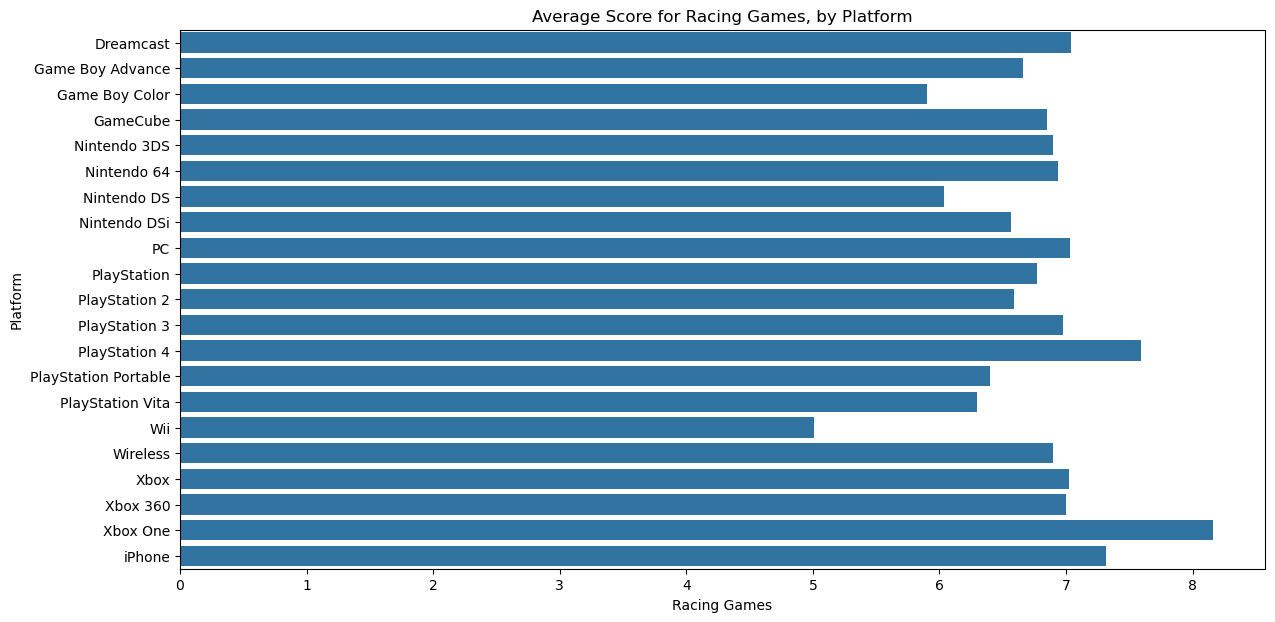

In [79]:
# Create a bar chart of average scores for racing games, by platform
plt.figure(figsize=(14,7))
sns.barplot(x=ign_df['Racing'], y=ign_df.index)
plt.xlabel('Racing Games')
plt.ylabel('Platform')
plt.title('Average Score for Racing Games, by Platform')
plt.show()


### Task: Which one is the Best One for Racing Games?

If `Wii` platform is not the best, which platform is?

In [80]:
# Which platform is best for racing games?
ign_df['Racing'].idxmax()
ign_df['Racing'].idxmin()
print(f'The best platform for racing games is {ign_df['Racing'].idxmax()}')
print(f'The worst platform for racing games is {ign_df['Racing'].idxmin()}')



The best platform for racing games is Xbox One
The worst platform for racing games is Wii


### Task: All Possible Combinations
Create a Heatmap of the average scores by genre in each cell

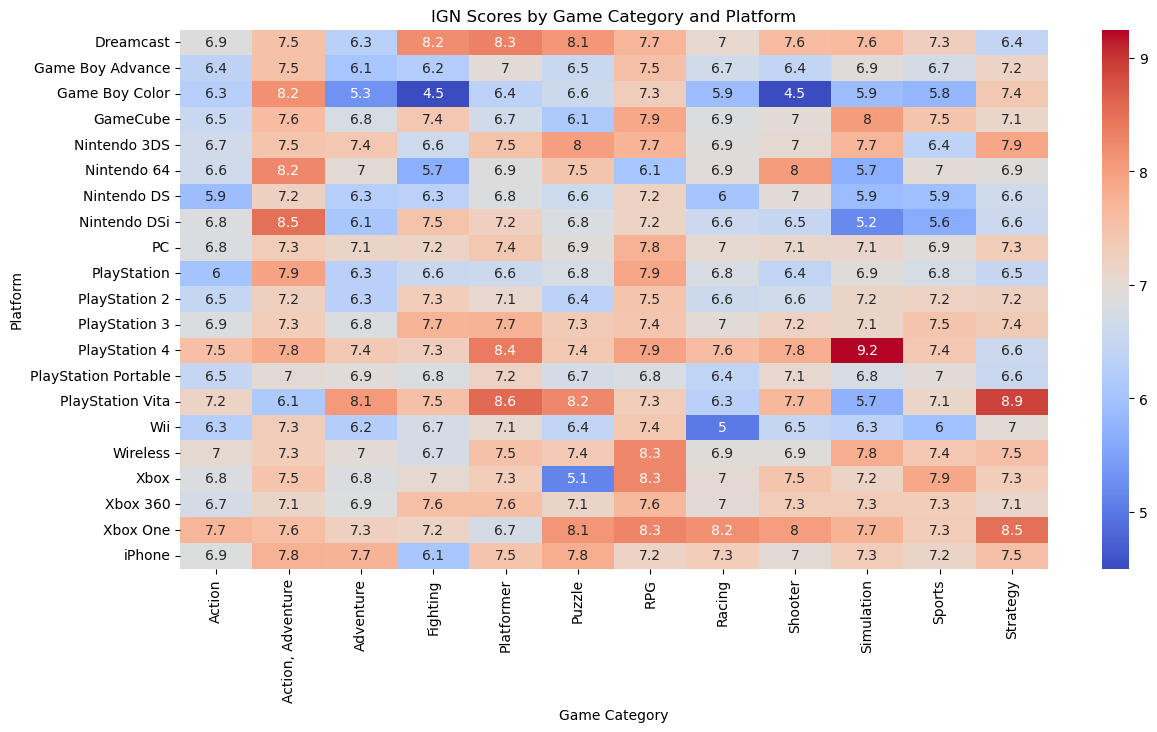

In [81]:
# Creating a heatmap of all game categories
plt.figure(figsize=(14,7))
sns.heatmap(data=ign_df, annot=True, cmap='coolwarm')
plt.xlabel('Game Category')
plt.ylabel('Platform')
plt.title('IGN Scores by Game Category and Platform')
plt.show()


### Task: Which Combination is Best?
- Which combination of `genre` and `platform` recieves the `highest` average ratings?
- Which combination receives the `lowest` average rating

In [82]:
# Which genre and platform combination has the highest average score?
# Stack() method makes a Series with multi-level index 
print(f'The genre and platform combination with the highest average score is {ign_df.stack().idxmax()} with a score of {ign_df.stack().max()}') 
# Which genre and platform combination has the lowest average score?
print(f'The genre and platform combination with the lowest average score is {ign_df.stack().idxmin()} with a score of {ign_df.stack().min()}')

The genre and platform combination with the highest average score is ('PlayStation 4', 'Simulation') with a score of 9.25
The genre and platform combination with the lowest average score is ('Game Boy Color', 'Fighting') with a score of 4.5


## Scatter Plots

### Load the Dataset
We will use a (syntehtic) dataset of medical insurance charges: `data/insurance.csv`

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the data
file_path = '../data/insurance.csv'
insurance_df = pd.read_csv(file_path)


# Print the first five rows of the data
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


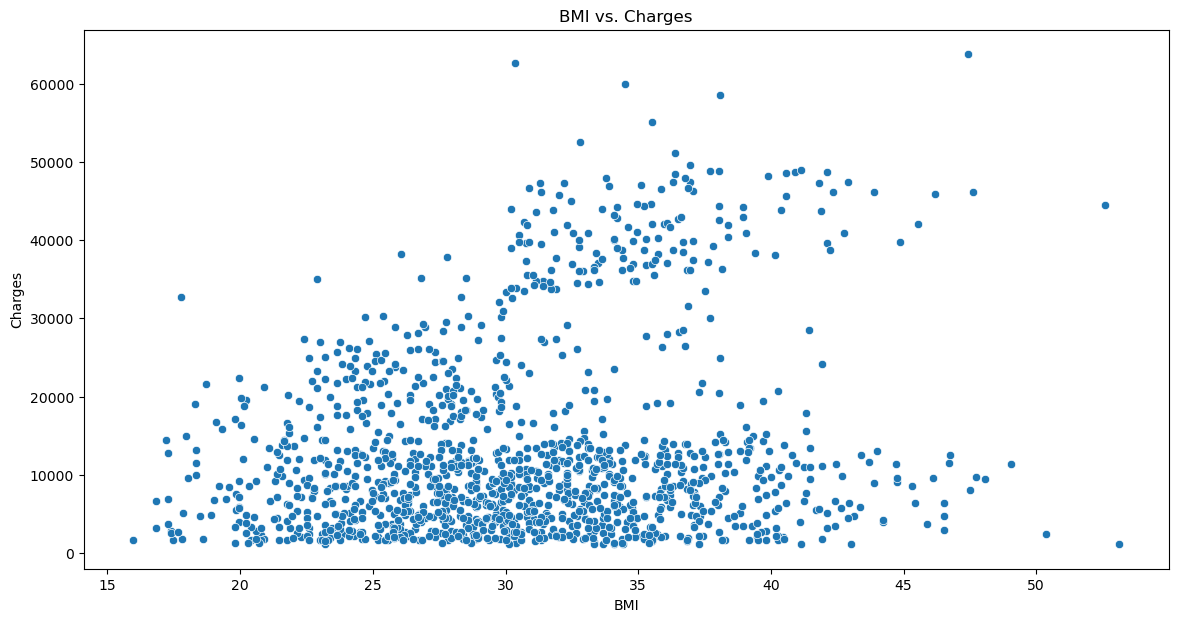

In [84]:
# Make a scatter plot
plt.figure(figsize=(14,7))
sns.scatterplot(x=insurance_df['bmi'], y=insurance_df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

The plot suggest we have a `postive correlation` between BMI and charges.
- Higher BMI tends to pay more

To double check the strength of this relationship, add a `regression line` that best fits the data.


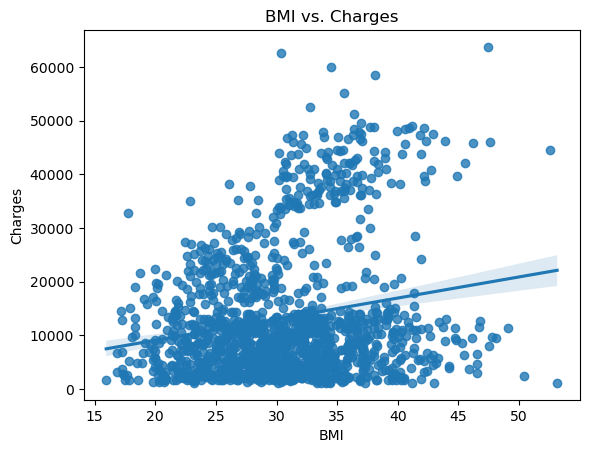

In [85]:
sns.regplot(x=insurance_df['bmi'], y=insurance_df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

### Color-coded Scatter Plots
They are good when you need to display the correlation between not two, but more variables.

We want to understand how `smoker` affect the relationship between `bmi` and `charges`

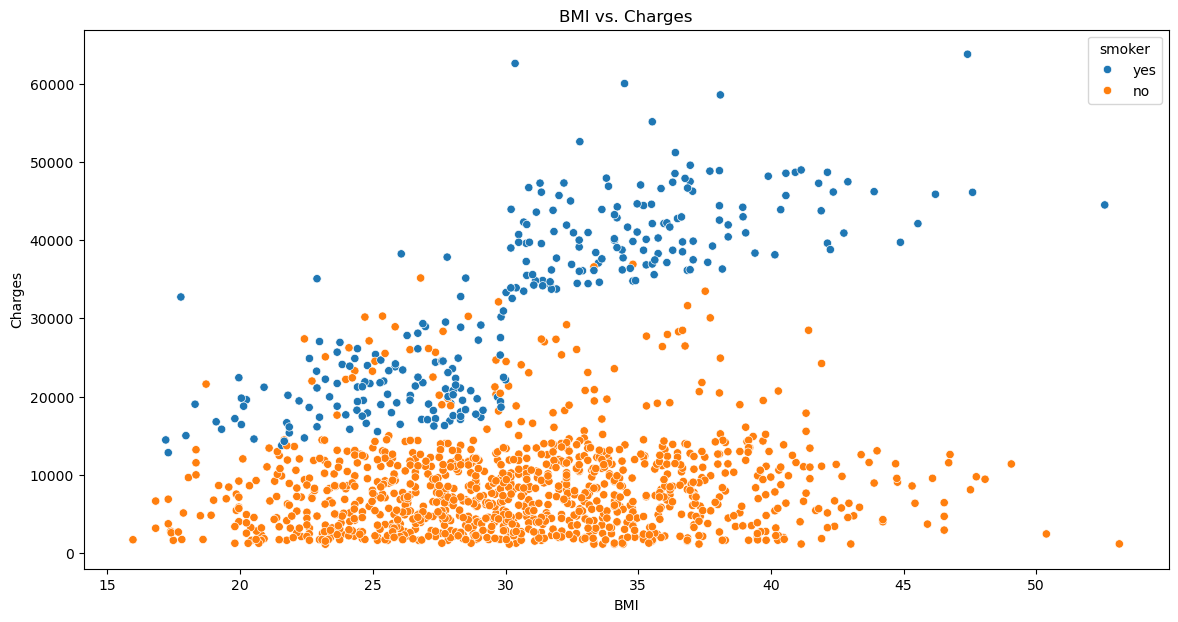

In [86]:
# Scatterm plot of bmi vs carges AND smoker vs charges
plt.figure(figsize=(14,7))
sns.scatterplot(x=insurance_df['bmi'], y=insurance_df['charges'], hue=insurance_df['smoker'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

<Figure size 1400x700 with 0 Axes>

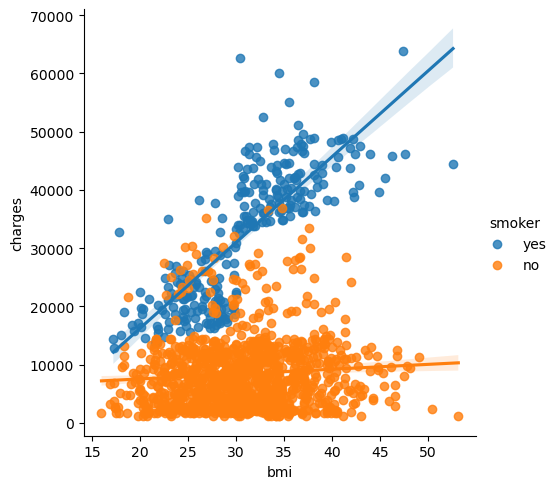

In [87]:
plt.figure(figsize=(14,7))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_df)
plt.show()

Finally, we can adapt the design of a scatter plot to feature a `catergorical variable` (like 'smoker') on one  of the main axis. Some people call this plot: **Catergorical Scatter Plot**

c:\Users\18019\anaconda3\envs\module6\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\18019\anaconda3\envs\module6\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


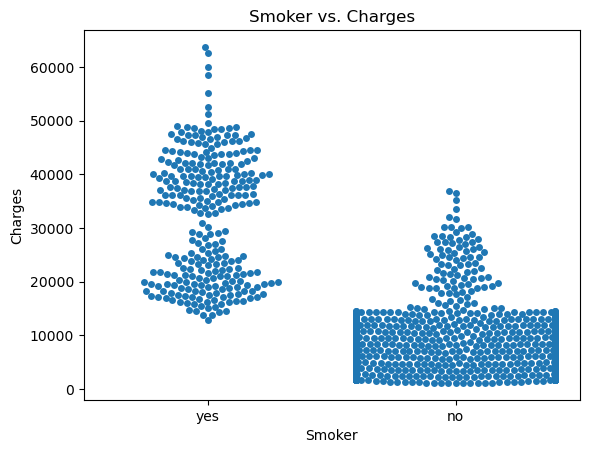

In [88]:
sns.swarmplot(x=insurance_df['smoker'], y=insurance_df['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

## Task: Candy Preferences
Analyze a candy survey dataset: `data/candy.csv` for favorate candies
- Use the `id` as index

In [89]:
# Load the data
file_path = '../data/candy.csv'
candy_df = pd.read_csv(file_path, index_col='id')

# print head()
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


### Task: Popularity
Which candy is more popular `3 Musketeers` or `Almond Joy`?
Which has more sugar?

In [92]:
# Which candy was more popular 3 musketeers or almond joy?
more_popular = candy_df.loc[candy_df['competitorname'].isin(['3 Musketeers', 'Almond Joy']), ['competitorname', 'winpercent']]
more_popular = more_popular.sort_values(by='winpercent', ascending=False)
print(more_popular)

   competitorname  winpercent
id                           
1    3 Musketeers   67.602936
3      Almond Joy   50.347546


In [93]:
# Which candy has more sugar 3 musketeers or almond joy?
more_sugar = candy_df.loc[candy_df['competitorname'].isin(['3 Musketeers', 'Almond Joy']), ['competitorname', 'sugarpercent']]
more_sugar = more_sugar.sort_values(by='sugarpercent', ascending=False)
print(more_sugar)

   competitorname  sugarpercent
id                             
1    3 Musketeers         0.604
3      Almond Joy         0.465


In [ ]:
# Create a scatterplot to compare sugar and winpercent
plt.figure(figsize=(14,7))